In [1]:
import nsc
from nsc.distributions import CoupledNormal, MultivariateCoupledNormal
import coupled_entropy_functions_mc_int as cef
import coupled_entropy_functions_mc_int_tfp as ceftfp
import numpy as np
from exact_coupled_gaussian_entropy import coupled_normal_entropy
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

Importing NSC lib v0.0.3.6.


100%|██████████| 100/100 [00:17<00:00,  5.60it/s]


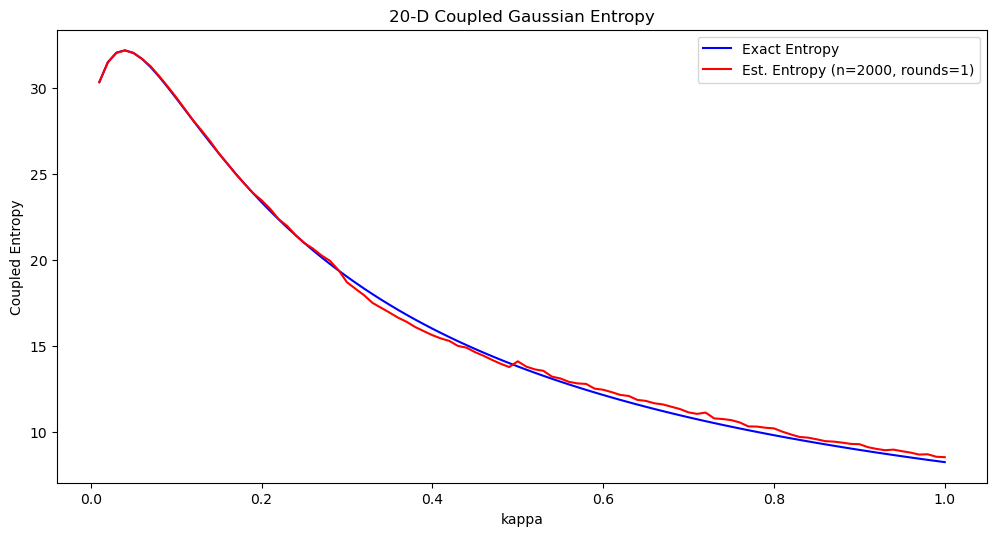

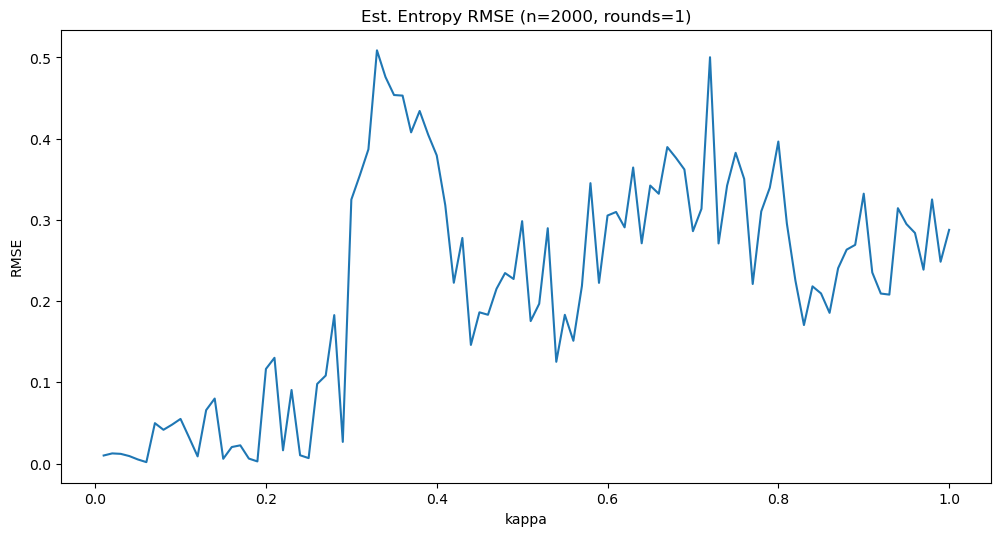

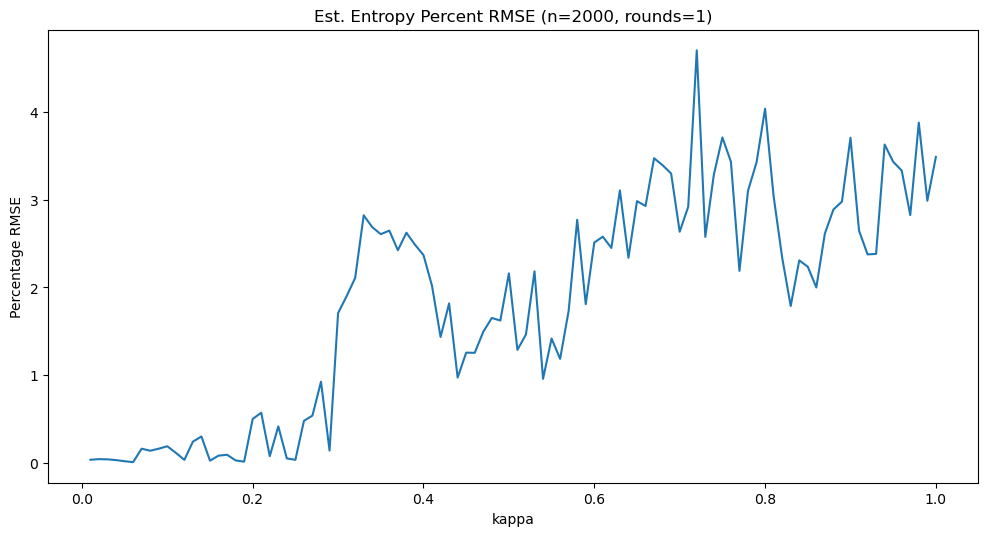

Avg. Run Time: 0.177099 seconds


In [2]:
loc, scale = 0., 1.

sample_size = 2000
n_rounds = 1
dim = 20

min_kappa, max_kappa, step_kappa = 0.01, 1, 0.01
kappas = np.arange(min_kappa, max_kappa+step_kappa, step_kappa)
exact_entropies = []
approx_entropies = []
mse = []
runtimes = []
for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)

    exact_coupled_entropy = coupled_normal_entropy(nsc_temp.scale, nsc_temp.kappa)
    exact_entropies.append(exact_coupled_entropy)
    
    start_time = datetime.now()
    approx_coupled_entropy = cef.coupled_entropy(nsc_temp.prob,
                                                 nsc_temp.sample_n,
                                                 kappa=nsc_temp.kappa,
                                                 alpha=nsc_temp.alpha,
                                                 dim=nsc_temp.dim,
                                                 root=False,
                                                 n=sample_size,
                                                 rounds=n_rounds)
    runtimes.append(datetime.now() - start_time)
    approx_entropies.append(approx_coupled_entropy)
    
    mse.append((exact_coupled_entropy-approx_coupled_entropy)**2)
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time = np.mean(runtimes)
mean_seconds = mean_time.seconds + mean_time.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds} seconds")

100%|██████████| 100/100 [00:24<00:00,  4.10it/s]


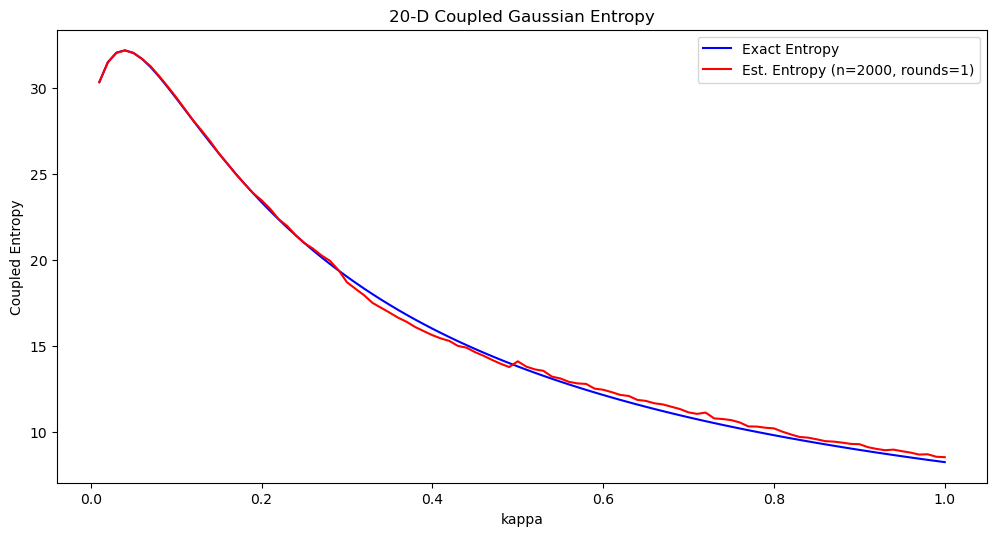

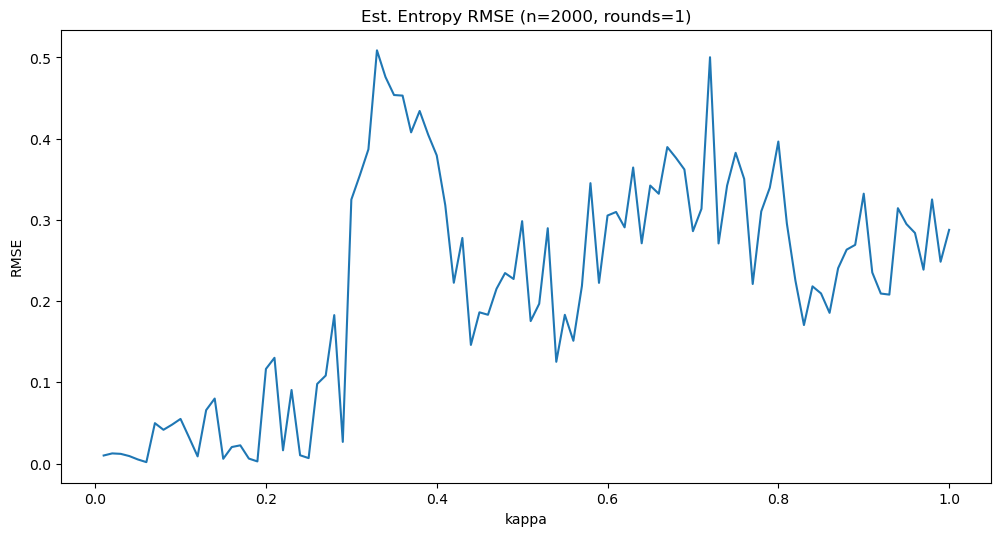

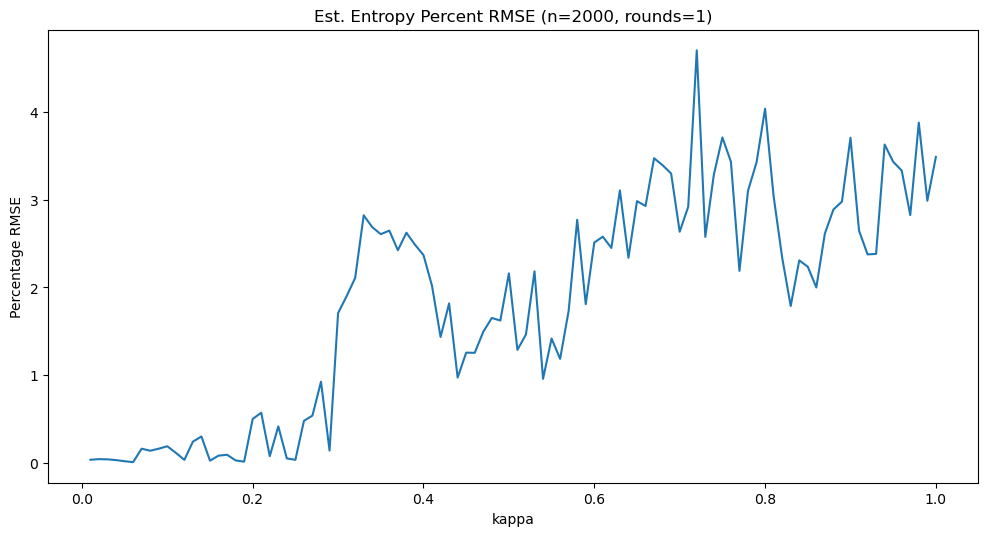

Avg. Run Time: 0.243003 seconds


In [3]:
approx_entropies_tfp = []
mse_tfp = []
runtimes_tfp = []

for i in tqdm(range(len(kappas))):
    kappa = kappas[i]
    nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                           scale=np.repeat(scale, dim), 
                                           kappa=kappa)
    
    start_time = datetime.now()
    approx_coupled_entropy_tfp = ceftfp.coupled_entropy(nsc_temp.prob,
                                                        nsc_temp.sample_n,
                                                        kappa=nsc_temp.kappa,
                                                        alpha=nsc_temp.alpha,
                                                        dim=nsc_temp.dim,
                                                        root=False,
                                                        n=sample_size,
                                                        rounds=n_rounds)
    runtimes_tfp.append(datetime.now() - start_time)
    approx_entropies_tfp.append(approx_coupled_entropy_tfp)
    
    mse_tfp.append((exact_entropies[i]-approx_coupled_entropy_tfp)**2)
    
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, exact_entropies, color="blue", label="Exact Entropy")
plt.plot(kappas, approx_entropies_tfp, color="red", label=f"Est. Entropy (n={sample_size}, rounds={n_rounds})")
plt.title(f"{dim}-D Coupled Gaussian Entropy")
plt.xlabel("kappa")
plt.ylabel("Coupled Entropy")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, np.sqrt(mse_tfp))
plt.xlabel("kappa")
plt.ylabel("RMSE")
plt.title(f"Est. Entropy RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(kappas, 100*(np.sqrt(mse_tfp)/exact_entropies))
plt.xlabel("kappa")
plt.ylabel("Percentage RMSE")
plt.title(f"Est. Entropy Percent RMSE (n={sample_size}, rounds={n_rounds})")
plt.show()

mean_time_tfp = np.mean(runtimes_tfp)
mean_seconds_tfp = mean_time_tfp.seconds + mean_time_tfp.microseconds/1000000
print(f"Avg. Run Time: {mean_seconds_tfp} seconds")

In [12]:
sample_sizes = np.arange(100, 10000+100-1, 100)
n_rounds = 1
dim = 20
runtimes = []
runtimes_tfp = []
mse = []
mse_tfp = []

nsc_temp = MultivariateCoupledNormal(loc=np.repeat(loc, dim), 
                                     scale=np.repeat(scale, dim),
                                     kappa=0.01)
exact_coupled_entropy = coupled_normal_entropy(nsc_temp.scale, nsc_temp.kappa)

seeds = np.arange(1, 1000, 1)

for i in tqdm(range(len(sample_sizes))):
    sample_size = sample_sizes[i]
    
    seed = np.random.choice(seeds, 1)
    
    start_time = datetime.now()
    approx_coupled_entropy = cef.coupled_entropy(nsc_temp.prob,
                                                 nsc_temp.sample_n,
                                                 kappa=nsc_temp.kappa,
                                                 alpha=nsc_temp.alpha,
                                                 dim=nsc_temp.dim,
                                                 root=False,
                                                 n=sample_size,
                                                 rounds=n_rounds)
    runtimes.append(datetime.now() - start_time)
    
    mse.append((exact_coupled_entropy-approx_coupled_entropy)**2)
    
    start_time = datetime.now()
    approx_coupled_entropy = ceftfp.coupled_entropy(nsc_temp.prob,
                                                    nsc_temp.sample_n,
                                                    kappa=nsc_temp.kappa,
                                                    alpha=nsc_temp.alpha,
                                                    dim=nsc_temp.dim,
                                                    root=False,
                                                    n=sample_size,
                                                    rounds=n_rounds)
    runtimes_tfp.append(datetime.now() - start_time)
    
    mse_tfp.append((exact_coupled_entropy-approx_coupled_entropy)**2)
    
runtimes = [time.seconds + time.microseconds/1000000 for time in runtimes]
runtimes_tfp = [time.seconds + time.microseconds/1000000 for time in runtimes_tfp]

100%|██████████| 100/100 [01:56<00:00,  1.16s/it]


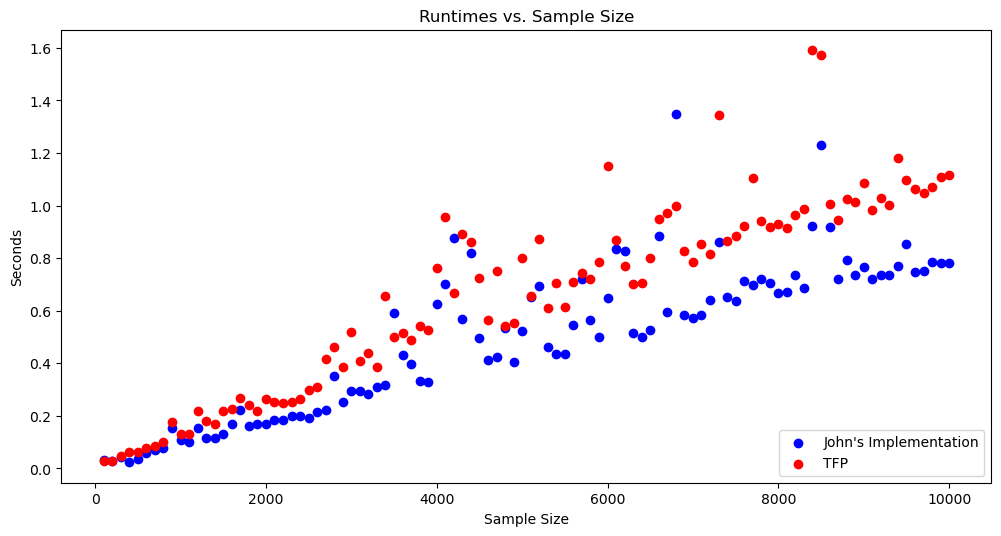

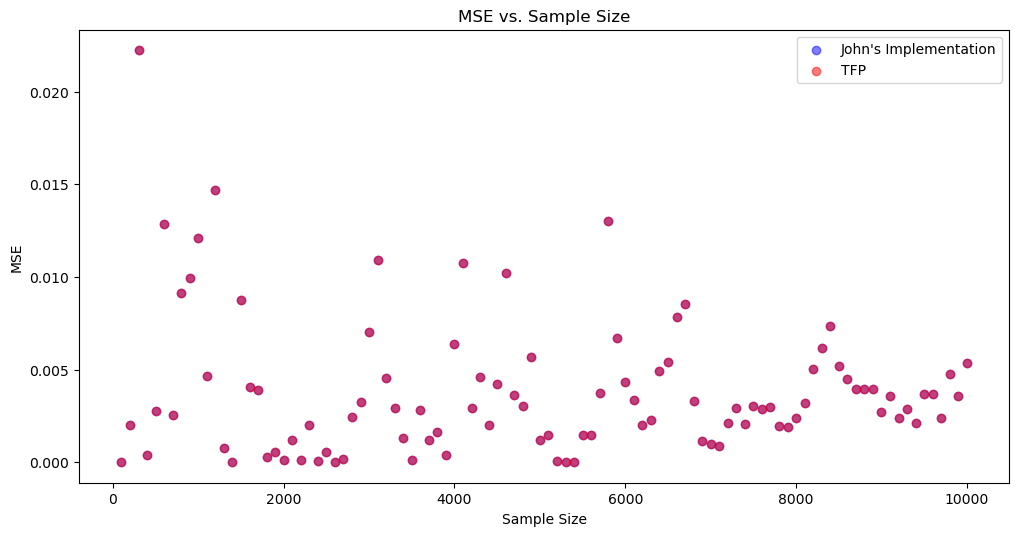

In [19]:
plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(sample_sizes, runtimes, 
         color="blue",
         label="John's Implementation")
plt.scatter(sample_sizes, runtimes_tfp,
        color="red",
        label="TFP")
plt.ylabel("Seconds")
plt.xlabel("Sample Size")
plt.title("Runtimes vs. Sample Size")
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(sample_sizes, mse, 
         color="blue",
         label="John's Implementation",
         alpha=0.5)
plt.scatter(sample_sizes, mse_tfp,
        color="red",
        label="TFP",
        alpha=0.5)
plt.ylabel("MSE")
plt.xlabel("Sample Size")
plt.title("MSE vs. Sample Size")
plt.legend(loc="upper right")
plt.show()